**Step1:Prepare a CSV file with comments or statements**

**Step 2:Upload CSV file**

In [1]:
from google.colab import files 
uploaded = files.upload()
filename = next(iter(uploaded))
filename


Saving 24payComments.csv to 24payComments.csv


'24payComments.csv'

**Step 3: Read the file**

In [2]:
import pandas as pd
def load_housing_data(filename=filename):
   return pd.read_csv(filename)

In [3]:
DataF=load_housing_data(filename)
DataF
#DataF['Comments']

,code,Comments
0,1,Great app. Only issue is that it doesn't tell ...
1,2,Very useful app. But the latest update (august...
2,3,"I like this app a lot, clean, fast, does the j..."
3,4,Pretty OK for what it's supposed to do. Graphi...
4,5,"Great, but in display fingerprint is not worki..."
5,6,It works perfectly. I don't have any complaint...
6,7,Quick and easy public transport payment.
7,8,Fast and comfortable way to pay for bus rides
8,9,The best option to buy tickts with the mobile ...
9,10,A very good application


**Step 4: calculate Polarity and create a column with its value**

In [4]:
from textblob import TextBlob
def getPolar(text):
  return TextBlob(text).sentiment.polarity

DataF['Polarity']=DataF['Comments'].apply(getPolar)

DataF


,code,Comments,Polarity
0,1,Great app. Only issue is that it doesn't tell ...,0.400000
1,2,Very useful app. But the latest update (august...,0.196667
2,3,"I like this app a lot, clean, fast, does the j...",0.283333
3,4,Pretty OK for what it's supposed to do. Graphi...,0.083333
4,5,"Great, but in display fingerprint is not worki...",0.800000
5,6,It works perfectly. I don't have any complaint...,1.000000
6,7,Quick and easy public transport payment.,0.255556
7,8,Fast and comfortable way to pay for bus rides,0.300000
8,9,The best option to buy tickts with the mobile ...,1.000000
9,10,A very good application,0.910000


**Step 5: Get positive, negative , neutral analysis**

In [5]:
def getPolarAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
DataF['PolarAnalysis']=DataF['Polarity'].apply(getPolarAnalysis)
DataF

,code,Comments,Polarity,PolarAnalysis
0,1,Great app. Only issue is that it doesn't tell ...,0.400000,Positive
1,2,Very useful app. But the latest update (august...,0.196667,Positive
2,3,"I like this app a lot, clean, fast, does the j...",0.283333,Positive
3,4,Pretty OK for what it's supposed to do. Graphi...,0.083333,Positive
4,5,"Great, but in display fingerprint is not worki...",0.800000,Positive
5,6,It works perfectly. I don't have any complaint...,1.000000,Positive
6,7,Quick and easy public transport payment.,0.255556,Positive
7,8,Fast and comfortable way to pay for bus rides,0.300000,Positive
8,9,The best option to buy tickts with the mobile ...,1.000000,Positive
9,10,A very good application,0.910000,Positive


**Step6: Display the Polarity analysis**

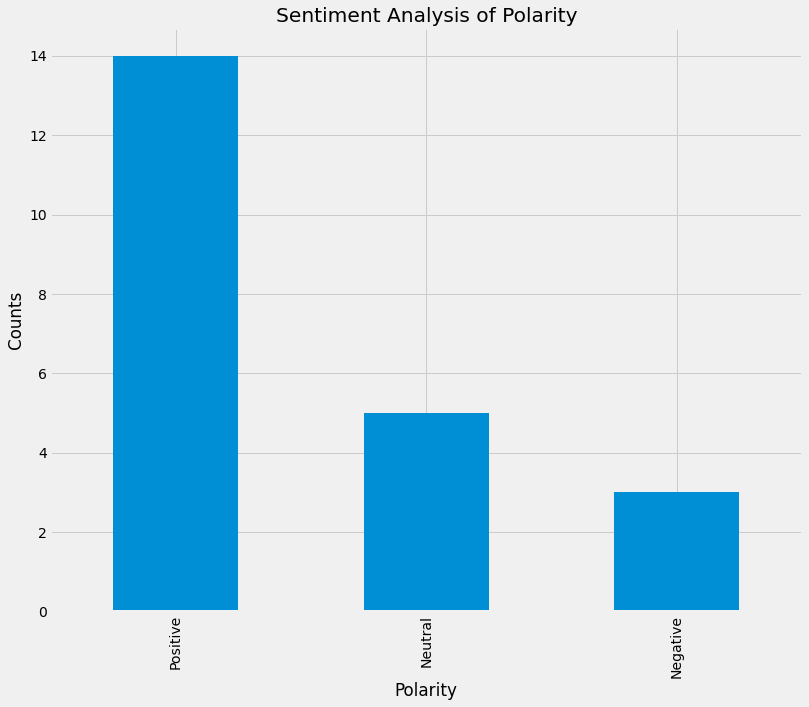

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Sentiment Analysis of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Counts')
DataF['PolarAnalysis'].value_counts().plot(kind='bar')
plt.show
plt.savefig('polarity.png')

## **Subjectivity**

**Step 7: calculate Subjectivity and create a column with its value**

In [7]:
def getSubj(text):
  return TextBlob(text).sentiment.subjectivity
DataF['Subjectivity']=DataF['Comments'].apply(getSubj)
DataF

,code,Comments,Polarity,PolarAnalysis,Subjectivity
0,1,Great app. Only issue is that it doesn't tell ...,0.400000,Positive,0.875000
1,2,Very useful app. But the latest update (august...,0.196667,Positive,0.366667
2,3,"I like this app a lot, clean, fast, does the j...",0.283333,Positive,0.650000
3,4,Pretty OK for what it's supposed to do. Graphi...,0.083333,Positive,0.666667
4,5,"Great, but in display fingerprint is not worki...",0.800000,Positive,0.750000
5,6,It works perfectly. I don't have any complaint...,1.000000,Positive,1.000000
6,7,Quick and easy public transport payment.,0.255556,Positive,0.466667
7,8,Fast and comfortable way to pay for bus rides,0.300000,Positive,0.700000
8,9,The best option to buy tickts with the mobile ...,1.000000,Positive,0.300000
9,10,A very good application,0.910000,Positive,0.780000


**Step 8: Display Sentiment Analysis**


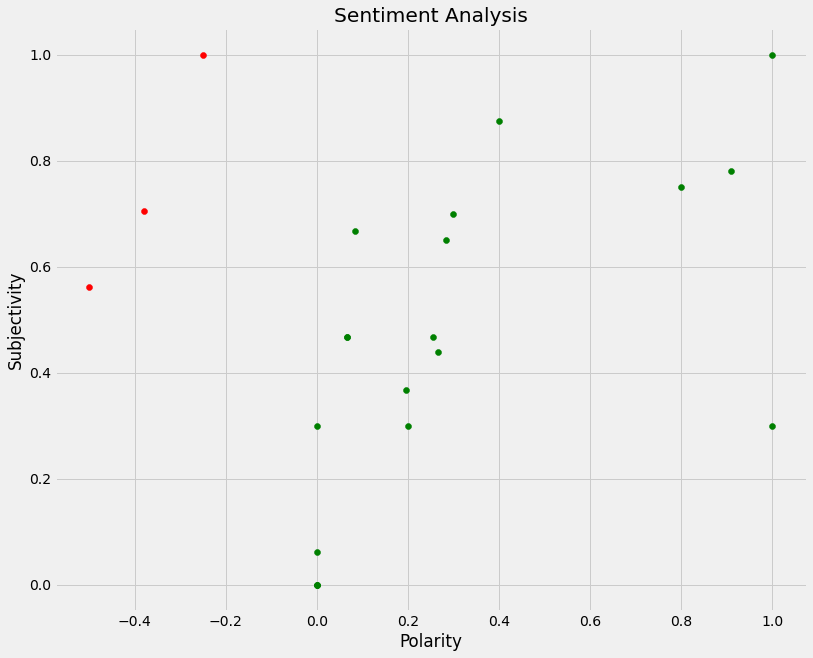

In [8]:
plt.figure(figsize=(12,10))
for i in range(0,DataF.shape[0]):
  if (DataF['Polarity'][i] <0):
    plt.scatter(DataF['Polarity'][i],DataF['Subjectivity'][i], color='Red')
  else:
    plt.scatter(DataF['Polarity'][i],DataF['Subjectivity'][i], color='Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('SA1.png')
plt.show()


## **Topic Modeling**

**Step 9: Data cleaning**


In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
import nltk
nltk.download('omw-1.4')
DataF['Comments_clean']=DataF['Comments'].apply(clean)
DataF['Comments_clean']

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0     [great, app, issue, tell, card, entry, expired...
1     [useful, app, latest, update, august, 2022, fo...
2                    [like, app, lot, clean, fast, job]
3     [pretty, ok, supposed, do, graphical, presenta...
4     [great, display, fingerprint, working, oneplus...
5                     [work, perfectly, complaint, now]
6             [quick, easy, public, transport, payment]
7              [fast, comfortable, way, pay, bus, ride]
8             [best, option, buy, tickts, mobile, cluj]
9                                   [good, application]
10    [cannot, add, one, debit, credit, card, kindly...
11    [please, add, option, buy, multiple, ticket, l...
12    [great, app, last, week, get, authentication, ...
13    [cannot, add, one, debit, credit, card, kindly...
14    [unfortunately, even, upgrading, bpay, still, ...
15    [low, level, documentation, category, look, bu...
16                 [practical, theory, im, issue, card]
17    [take, insane, amount, time, navigate, men

**Step 10: Create dictionary and term matrix**

In [14]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
dictionary = corpora.Dictionary(DataF['Comments_clean'])
term_matrix = [dictionary.doc2bow(doc) for doc in DataF['Comments_clean'] ]

In [15]:
print(dictionary.num_nnz)

191


In [16]:
print(len(term_matrix))

22


In [17]:
term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(0, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(0, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(5, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)],
 [(44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1)],
 [(21, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(1, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)],
 [(12, 1), (63, 1)],
 [(2, 1),
  (23, 1),
  (55, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)],
 [(1, 1),
  (8, 1),
  (61, 1),
  (64, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(0, 1),
  (5, 1),
  (6, 1

**Step 11:Latent Dirichlet allocation (LDA)**

In [18]:
lda = gensim.models.ldamodel.LdaModel

In [19]:
num_topics=2
%time ldamodel = lda(term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 430 ms, sys: 19 ms, total: 449 ms
Wall time: 437 ms


https://radimrehurek.com/gensim/models/ldamodel.html

In [20]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.029*"ticket" + 0.029*"buy" + 0.024*"time" + 0.024*"card" + 0.018*"add" + 0.018*"number" + 0.013*"pay" + 0.013*"cannot" + 0.013*"like" + 0.013*"google"'),
 (1,
  '0.026*"app" + 0.025*"application" + 0.018*"great" + 0.018*"like" + 0.018*"fast" + 0.018*"it" + 0.018*"working" + 0.011*"issue" + 0.011*"get" + 0.011*"functionally"')]

**Step 12: Display Topics Map Using LDAvis**

In [21]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim 
lda_display = pyLDAvis.gensim.prepare(ldamodel, term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=26e8208e3d5d6e16910cbbc7f69ae1c05ab8bd4f268c80a753569f9d2a64da03
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


**Step 13: Assign the topics to the statements (corpus)**

In [22]:
lda_corpus = ldamodel[term_matrix]
[doc for doc in lda_corpus]

[[(0, 0.94552463), (1, 0.054475382)],
 [(0, 0.047286063), (1, 0.95271397)],
 [(0, 0.07774124), (1, 0.9222588)],
 [(0, 0.034339584), (1, 0.9656604)],
 [(0, 0.074393526), (1, 0.9256064)],
 [(0, 0.89460737), (1, 0.10539266)],
 [(0, 0.91206807), (1, 0.08793196)],
 [(0, 0.07963357), (1, 0.9203664)],
 [(0, 0.9252223), (1, 0.07477772)],
 [(0, 0.17003016), (1, 0.8299699)],
 [(0, 0.96605337), (1, 0.033946633)],
 [(0, 0.9479702), (1, 0.052029837)],
 [(0, 0.054965924), (1, 0.9450341)],
 [(0, 0.9660432), (1, 0.033956774)],
 [(0, 0.9624213), (1, 0.03757873)],
 [(0, 0.043644343), (1, 0.95635563)],
 [(0, 0.909645), (1, 0.090354964)],
 [(0, 0.9497437), (1, 0.050256312)],
 [(0, 0.95790595), (1, 0.04209406)],
 [(0, 0.9429205), (1, 0.057079528)],
 [(0, 0.94223523), (1, 0.05776477)],
 [(0, 0.09887383), (1, 0.9011262)]]

**Step 14: classify the statements into clusters**

In [23]:
threshold=0.8
cluster1 = [j for i,j in zip(lda_corpus,DataF.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,DataF.index) if i[1][1] > threshold]
print(len(cluster1))
print(len(cluster2))

13
9


In [24]:
DataF.iloc[cluster1]

,code,Comments,Polarity,PolarAnalysis,Subjectivity,Comments_clean
0,1,Great app. Only issue is that it doesn't tell ...,0.400000,Positive,0.875000,"[great, app, issue, tell, card, entry, expired..."
5,6,It works perfectly. I don't have any complaint...,1.000000,Positive,1.000000,"[work, perfectly, complaint, now]"
6,7,Quick and easy public transport payment.,0.255556,Positive,0.466667,"[quick, easy, public, transport, payment]"
8,9,The best option to buy tickts with the mobile ...,1.000000,Positive,0.300000,"[best, option, buy, tickts, mobile, cluj]"
10,11,Cannot add more than one debit or credit card....,0.066667,Positive,0.466667,"[cannot, add, one, debit, credit, card, kindly..."
11,12,Please add an option to buy multiple tickets o...,0.000000,Neutral,0.062500,"[please, add, option, buy, multiple, ticket, l..."
13,14,Cannot add more than one debit or credit card....,0.066667,Positive,0.466667,"[cannot, add, one, debit, credit, card, kindly..."
14,15,"Unfortunately, even after the upgrading from B...",-0.250000,Negative,1.000000,"[unfortunately, even, upgrading, bpay, still, ..."
16,17,"Very practical in theory, but I'm having some ...",0.200000,Positive,0.300000,"[practical, theory, im, issue, card]"
17,18,It takes an insane amount of time to navigate ...,-0.500000,Negative,0.562500,"[take, insane, amount, time, navigate, menu, e..."


In [25]:
DataF.iloc[cluster2]

,code,Comments,Polarity,PolarAnalysis,Subjectivity,Comments_clean
1,2,Very useful app. But the latest update (august...,0.196667,Positive,0.366667,"[useful, app, latest, update, august, 2022, fo..."
2,3,"I like this app a lot, clean, fast, does the j...",0.283333,Positive,0.650000,"[like, app, lot, clean, fast, job]"
3,4,Pretty OK for what it's supposed to do. Graphi...,0.083333,Positive,0.666667,"[pretty, ok, supposed, do, graphical, presenta..."
4,5,"Great, but in display fingerprint is not worki...",0.800000,Positive,0.750000,"[great, display, fingerprint, working, oneplus..."
7,8,Fast and comfortable way to pay for bus rides,0.300000,Positive,0.700000,"[fast, comfortable, way, pay, bus, ride]"
9,10,A very good application,0.910000,Positive,0.780000,"[good, application]"
12,13,"Great app, but in the last week's I get authen...",0.266667,Positive,0.438889,"[great, app, last, week, get, authentication, ..."
15,16,Low level of documentation for each category. ...,0.000000,Neutral,0.300000,"[low, level, documentation, category, look, bu..."
21,22,It stops working the second time I used it.,0.000000,Neutral,0.000000,"[stop, working, second, time, used, it]"
